<a href="https://colab.research.google.com/github/Dimble-Scaria/Tackling-counterfeit-products-using-CNN/blob/main/Capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import cv2
from PIL import Image
import glob
import skimage

In [2]:
from google.colab import drive                #Mounting with google drive
drive.mount('/content/gdrive/', force_remount=True)


Mounted at /content/gdrive/


In [3]:
image_list = []
for filename in glob.glob('/content/gdrive/MyDrive/capstone_project/tom/*.jpg'):
    img_color = cv2.imread(filename,1)
    image_list.append(img_color)
    #plt.imshow(img_color)
    #plt.axis("off") 
    #plt.show()
    
'''img_color = cv2.imread('rosebud-6006985_1280.jpg',1)
img_grayscale = cv2.imread('rosebud-6006985_1280.jpg',0)
img_unchanged = cv2.imread('rosebud-6006985_1280.jpg',-1)
  '''  

"img_color = cv2.imread('rosebud-6006985_1280.jpg',1)\nimg_grayscale = cv2.imread('rosebud-6006985_1280.jpg',0)\nimg_unchanged = cv2.imread('rosebud-6006985_1280.jpg',-1)\n  "

In [4]:
print(len(image_list))          # image_list contains the images in BGR scale 
fig=image_list[2]
fig.shape

1930


(480, 854, 3)

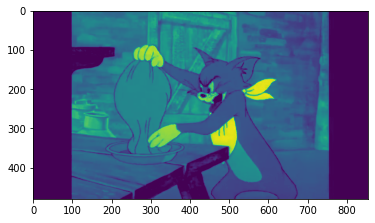

In [5]:
#plt.imshow(fig)  #Original image
#plt.imshow(fig[:, : , 0]) #Red
plt.imshow(fig[:, : , 1]) #Green
#plt.imshow(fig[:, : , 2]) #Blue

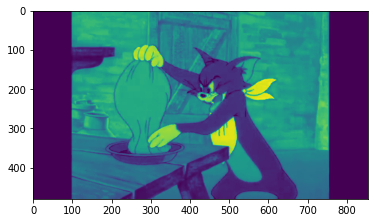

In [6]:
plt.imshow(fig[:, : , 2]) #Blue

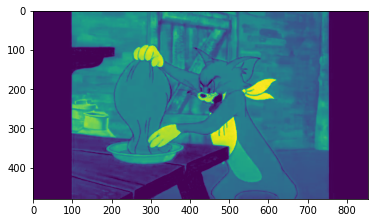

In [7]:
plt.imshow(fig[:, : , 0])#Red

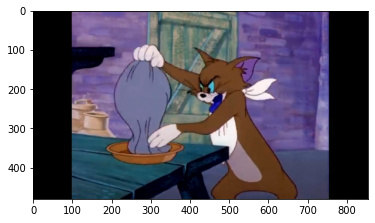

In [8]:
plt.imshow(fig)

Image Preprocessing techniques:
1.   Grayscale conversion
2.   Normalisation
3.   Data Augmentation
4.   Image standardization




# Grayscale Conversion 

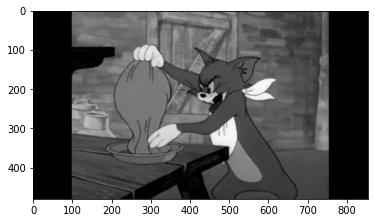

In [9]:
fig_gray_image = skimage.color.rgb2gray(fig)
plt.imshow(fig_gray_image, cmap = 'gray')

In [10]:
gray_image_list=[]
for i in range(1000):
  k=skimage.color.rgb2gray(image_list[i])
  gray_image_list.append(k)


In [11]:
#for i in range(1001,1980):
#  print(i)
len(gray_image_list)
gray_image_list[0].shape

(480, 854)

In [12]:
'''for i in range(len(gray_image_list)):
  plt.imshow(gray_image_list[i], cmap = 'gray')'''

"for i in range(len(gray_image_list)):\n  plt.imshow(gray_image_list[i], cmap = 'gray')"

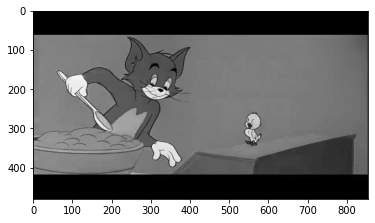

In [13]:
plt.imshow(gray_image_list[0], cmap = 'gray')

# Data Normalization

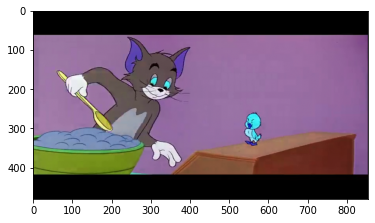

In [22]:
norm_image = (image_list[0] - np.min(image_list[0])) / (np.max(image_list[0]) - np.min(image_list[0]))
plt.imshow(norm_image)

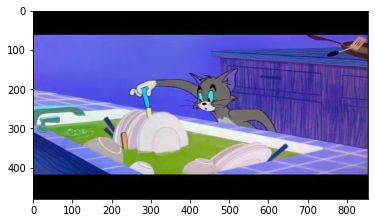

In [18]:
plt.imshow(image_list[1])

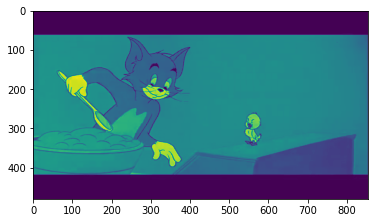

In [23]:
norm_image = (gray_image_list[0] - np.min(gray_image_list[0])) / (np.max(gray_image_list[0]) - np.min(gray_image_list[0]))
plt.imshow(norm_image)

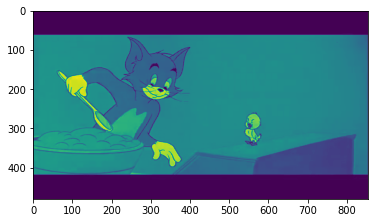

In [21]:

plt.imshow(gray_image_list[0])

# Data Augmentation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mpl.rcParams['figure.figsize'] = (10, 5)
mpl.rcParams['axes.grid'] = False

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(8, activation="relu"))
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(140, activation="sigmoid"))

In [ ]:
class AutoEncoder(Model):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = tf.keras.Sequential([
                  tf.keras.layers.Dense(64, activation="relu"),
                  tf.keras.layers.Dense(32, activation="relu"),
                  tf.keras.layers.Dense(16, activation="relu"),
                  tf.keras.layers.Dense(8, activation="relu")
              ])
    self.decoder = tf.keras.Sequential([
                  tf.keras.layers.Dense(16, activation="relu"),
                  tf.keras.layers.Dense(32, activation="relu"),
                  tf.keras.layers.Dense(64, activation="relu"),
                  tf.keras.layers.Dense(140, activation="sigmoid")
              ])
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded